Introduction
In this activity, you will implement and apply key evaluation metrics to measure the performance of a reinforcement learning (RL) agent. This activity will help you understand how to evaluate an RL agent’s performance using metrics such as cumulative reward, episode length, success rate, and exploration-exploitation ratio. These metrics will help you assess how well the agent is learning and optimizing its actions.

By the end of this activity, you will be able to:

Implement key evaluation metrics for a reinforcement learning (RL) agent. 

Analyze its performance using metrics such as cumulative reward, episode length, success rate, and exploration-exploitation ratio.

Define the environment and reward structure
In this activity, you will use a simple grid environment where an RL agent learns to navigate from a random start position to a goal state while avoiding pitfalls.

The environment is a 5 x 5 grid where each cell represents a state. The goal is located at the bottom-right corner, and a pitfall is placed at the center. The agent receives:

+10 points for reaching the goal.

–10 points for falling into the pit.

–1 point for all other moves to encourage efficiency.

In [1]:
import numpy as np

# Define the grid size and number of states
grid_size = 5
n_states = grid_size * grid_size

# Define the reward structure: -1 for all states, +10 for the goal, -10 for the pitfall
rewards = np.full((n_states,), -1)  # Default reward of -1
rewards[24] = 10  # Goal state at position 24 (bottom-right)
rewards[12] = -10  # Pitfall at position 12 (center)

Step 2: Train the agent using Q-learning
Next, you will train the RL agent using the Q-learning algorithm. Once the agent is trained, you’ll apply the evaluation metrics to measure its performance.

Implement the Q-learning algorithm
The Q-learning algorithm learns the value of each state-action pair by updating a Q-table. You’ll train the agent over 1,000 episodes, allowing it to explore the environment and optimize its policy.

In [2]:
# Define the number of actions (up, down, left, right)
n_actions = 4

def epsilon_greedy_action(Q_table, state, epsilon):
    # Epsilon-greedy strategy: with probability epsilon, take a random action (exploration)
    # otherwise take the action with the highest Q-value for the given state (exploitation)
    if np.random.rand() < epsilon:  # Exploration
        return np.random.randint(0, Q_table.shape[1])  # Random action
    else:  # Exploitation
        return np.argmax(Q_table[state])  # Action with the highest Q-value


alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate for epsilon-greedy policy

# Initialize the Q-table
Q_table = np.zeros((n_states, n_actions))

# Training loop
for episode in range(1000):
    state = np.random.randint(0, n_states)  # Start at random state
    done = False
    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)
        next_state = np.random.randint(0, n_states)  # Random next state
        reward = rewards[next_state]

        # Q-learning update rule
        Q_table[state, action] = Q_table[state, action] + alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action])

        state = next_state
        if next_state == 24 or next_state == 12:  # End episode if goal or pitfall is reached
            done = True

Step 3: Apply evaluation metrics
Once the agent has completed training, you’ll apply several evaluation metrics to assess its performance.

Metric 1: Cumulative reward
The cumulative reward is the total reward collected by the agent during each episode. This metric helps you see how well the agent is optimizing its actions over time.

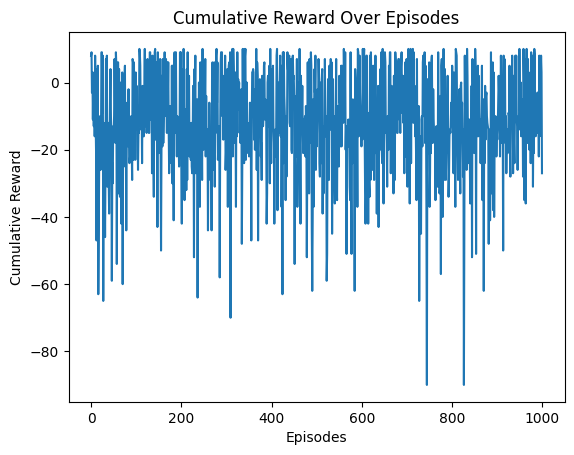

In [3]:
import matplotlib.pyplot as plt

# Calculate and store cumulative rewards
cumulative_rewards = []
for episode in range(1000):
    total_reward = 0
    state = np.random.randint(0, n_states)
    done = False
    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)
        next_state = np.random.randint(0, n_states)
        reward = rewards[next_state]
        total_reward += reward
        state = next_state
        if next_state == 24 or next_state == 12:
            done = True
    cumulative_rewards.append(total_reward)

# Plot the cumulative rewards over episodes
plt.plot(cumulative_rewards)
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Over Episodes')
plt.show()

Metric 2: Episode length
Episode length measures the number of steps the agent takes to complete an episode. Shorter episode lengths may indicate that the agent is learning to reach the goal more efficiently.

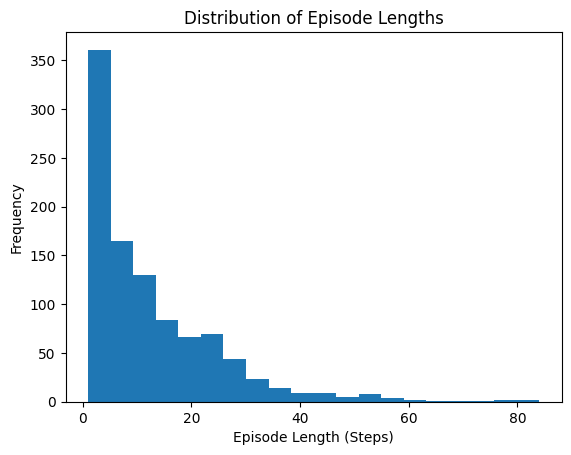

In [4]:
# Calculate and store episode lengths
episode_lengths = []
actions = []
for episode in range(1000):
    steps = 0
    state = np.random.randint(0, n_states)
    done = False
    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)
        
        next_state = np.random.randint(0, n_states)
        steps += 1
        state = next_state
        if next_state == 24 or next_state == 12:
            done = True
    episode_lengths.append(steps)

# Plot a histogram of episode lengths
plt.hist(episode_lengths, bins=20)
plt.xlabel('Episode Length (Steps)')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Lengths')
plt.show()

Metrics 3 and 4: Success rate and exploration vs. exploitation ratio
The success rate measures how often the agent successfully reaches the goal during training. A higher success rate indicates better learning and optimization.

The exploration vs. exploitation ratio helps you evaluate how the agent balances between exploring new actions and exploiting known optimal actions.

In [5]:
# Redefine epsilon_greedy_action to log explorations & exploitations
actions = []
def epsilon_greedy_action(Q_table, state, epsilon):
    # Epsilon-greedy strategy: with probability epsilon, take a random action (exploration)
    # otherwise take the action with the highest Q-value for the given state (exploitation)
    if np.random.rand() < epsilon:  # Exploration
        actions.append('explore')
        return np.random.randint(0, Q_table.shape[1])  # Random action
    else:  # Exploitation
        actions.append('exploit')
        return np.argmax(Q_table[state])  # Action with the highest Q-value

# Calculate and store cumulative rewards and actions
cumulative_rewards = []
for episode in range(1000):
    total_reward = 0
    state = np.random.randint(0, n_states)
    done = False
    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)
        next_state = np.random.randint(0, n_states)
        reward = rewards[next_state]
        total_reward += reward
        state = next_state
        if next_state == 24 or next_state == 12:
            done = True
    cumulative_rewards.append(total_reward)

# Calculate success rate
success_count = sum(1 for reward in cumulative_rewards if reward >= 10)
success_rate = success_count / len(cumulative_rewards)

# Exploration vs. exploitation ratio
#print(actions)
exploration_count = sum(1 for action in actions if action == 'explore')
exploitation_count = sum(1 for action in actions if action == 'exploit')
exploration_exploitation_ratio = exploration_count / (exploration_count + exploitation_count)

print(f"Success Rate: {success_rate * 100}%")
print(f"Exploration vs. Exploitation Ratio: {exploration_exploitation_ratio}")

Success Rate: 4.6%
Exploration vs. Exploitation Ratio: 0.09893758300132802


Step 4: Analyze the results
After applying the evaluation metrics, analyze the results:

Cumulative reward: is the agent’s cumulative reward increasing over time? If yes, the agent is learning to maximize rewards effectively.

Episode length: are the episode lengths decreasing over time? This could indicate that the agent is becoming more efficient at reaching the goal.

Success rate: is the agent reaching the goal more frequently? A high success rate reflects successful learning.

Exploration vs. exploitation: is the agent balancing exploration and exploitation appropriately? Too much exploration may slow down learning, while too much exploitation may cause the agent to get stuck in suboptimal strategies.

Conclusion
In this activity, you trained an RL agent using Q-learning and applied several evaluation metrics to measure its performance. These metrics—cumulative reward, episode length, success rate, and exploration-exploitation ratio—are essential tools to understand how well an RL agent is learning and whether it is optimizing its actions effectively.

Make sure to experiment with different hyperparameters, and observe how the evaluation metrics change based on different training conditions.